In [1]:
import numpy as np

import sys
sys.path.append("/home/alvaro/Desktop/MachineLearning/PracticalApplications/1-3/my-staff")
from utils import load_ds, show_confusion_matrix, show_report, eval_model

from mnn import create_model, train, show_train, predict

2023-10-12 00:27:07.450806: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-12 00:27:07.452221: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 00:27:07.473316: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-12 00:27:07.473342: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-12 00:27:07.473356: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
X, y, features_names, class_names = load_ds("all_encoded_cirrhosis")
X.shape

(293, 25)

In [3]:
X = X.astype(np.float32)
y = y.astype(np.float32)

# Hiperparametros

In [4]:
EPOCHS = 1000
BATCH_SIZE = 128  # Al haber pocos datos se puede meter el dataset entero en cada epoca
LEARNING_RATE = 1e-3
LAMBDA = 0.01
PATIENCE = 10

# Elección de una configuración

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from numpy import mean

# CreaTe a KFold object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [6]:
hidden_neurons = range(2, 50, 8)
print(list(hidden_neurons))

for n in hidden_neurons:
    print("-"*10,"\n","Training with", n, " neurons")

    scores = []

    for train_index, test_index in kf.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model([n], LAMBDA, len(class_names), LEARNING_RATE)

        train(X_train, y_train, X_test, y_test,  model, EPOCHS, BATCH_SIZE, patience=PATIENCE) # el entrenamiento se detiene si el val_loss no mejora durante PATIENCE epochs consecutivas
        y_pred = predict(model, X_test)

        scores.append(f1_score(y_test, y_pred, average='weighted'))

    print("Score f1", mean(scores) )


[2, 10, 18, 26, 34, 42]
---------- 
 Training with 2  neurons
Entrenamiento detenido en 836 epocas
4/4 [==============================] - 0s 1ms/step
Entrenamiento detenido en 0 epocas
4/4 [==============================] - 0s 940us/step
Entrenamiento detenido en 0 epocas
4/4 [==============================] - 0s 1ms/step
Score f1 0.4196687089072902
---------- 
 Training with 10  neurons
Entrenamiento detenido en 344 epocas
4/4 [==============================] - 0s 954us/step
Entrenamiento detenido en 603 epocas
4/4 [==============================] - 0s 844us/step
Entrenamiento detenido en 389 epocas
4/4 [==============================] - 0s 1ms/step
Score f1 0.7112801890320791
---------- 
 Training with 18  neurons
Entrenamiento detenido en 339 epocas
4/4 [==============================] - 0s 1ms/step
Entrenamiento detenido en 207 epocas
4/4 [==============================] - 0s 974us/step
Entrenamiento detenido en 178 epocas
4/4 [==============================] - 0s 1ms/step
Score f1

Entrenando con la técnica "early stopping" se evita que el modelo sobre ajuste, aunque puede hacer que el modelo le falten épocas de aprendizaje, como los resultados son muy buenos ya elegimos el modelo con menos neuronas y mejor resultado para que sea más eficiente. Además, con regularización ayuda a que el modelo no sobre ajuste.

# Create model

In [7]:
model_final = create_model([42], LAMBDA, len(class_names), LEARNING_RATE)

# Train


In [8]:
from sklearn.model_selection import train_test_split
from globals import TEST_SIZE, SEED

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                                y,
                                                                test_size=TEST_SIZE,
                                                                random_state=SEED)

print(len(X_train), len(X_test))

205 88


In [10]:
history = train(X_train, y_train, X_test, y_test, model_final, EPOCHS, BATCH_SIZE, verbose=True)

Epoch 1/1000
2/2 [==============================] - 0s 78ms/step - loss: 79.4686 - accuracy: 0.6098 - val_loss: 59.0967 - val_accuracy: 0.6250
Epoch 2/1000
2/2 [==============================] - 0s 17ms/step - loss: 52.7783 - accuracy: 0.6244 - val_loss: 32.8205 - val_accuracy: 0.6477
Epoch 3/1000
2/2 [==============================] - 0s 18ms/step - loss: 30.5726 - accuracy: 0.6585 - val_loss: 13.6951 - val_accuracy: 0.7159
Epoch 4/1000
2/2 [==============================] - 0s 22ms/step - loss: 16.1134 - accuracy: 0.6976 - val_loss: 13.5430 - val_accuracy: 0.6250
Epoch 5/1000
2/2 [==============================] - 0s 15ms/step - loss: 19.6571 - accuracy: 0.4976 - val_loss: 23.9092 - val_accuracy: 0.4432
Epoch 6/1000
2/2 [==============================] - 0s 21ms/step - loss: 26.7322 - accuracy: 0.4293 - val_loss: 16.7876 - val_accuracy: 0.5114
Epoch 7/1000
2/2 [==============================] - 0s 19ms/step - loss: 18.4557 - accuracy: 0.5512 - val_loss: 10.3058 - val_accuracy: 0.7500

In [11]:
model_final.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 42)                1092      
                                                                 
 dense_36 (Dense)            (None, 2)                 86        
                                                                 
Total params: 1178 (4.60 KB)
Trainable params: 1178 (4.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


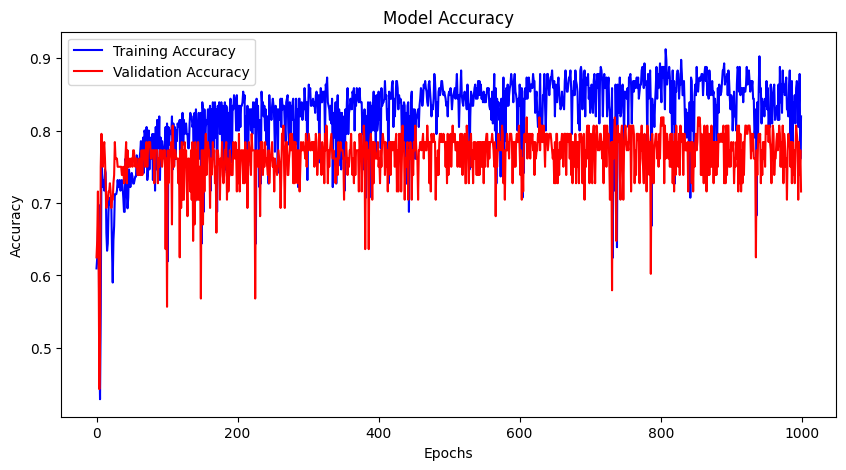

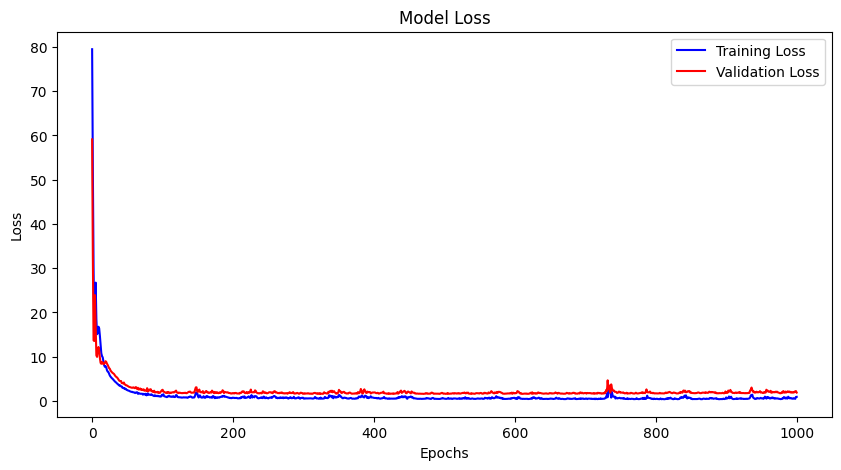

In [12]:
show_train(history)

3/3 [==============================] - 0s 2ms/step
{'0.0': {'precision': 0.7906976744186046, 'recall': 0.68, 'f1-score': 0.7311827956989247, 'support': 50.0}, '1.0': {'precision': 0.6444444444444445, 'recall': 0.7631578947368421, 'f1-score': 0.6987951807228916, 'support': 38.0}, 'accuracy': 0.7159090909090909, 'macro avg': {'precision': 0.7175710594315245, 'recall': 0.7215789473684211, 'f1-score': 0.7149889882109082, 'support': 88.0}, 'weighted avg': {'precision': 0.7275428705661263, 'recall': 0.7159090909090909, 'f1-score': 0.7171972346865467, 'support': 88.0}}
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73        50
         1.0       0.64      0.76      0.70        38

    accuracy                           0.72        88
   macro avg       0.72      0.72      0.71        88
weighted avg       0.73      0.72      0.72        88



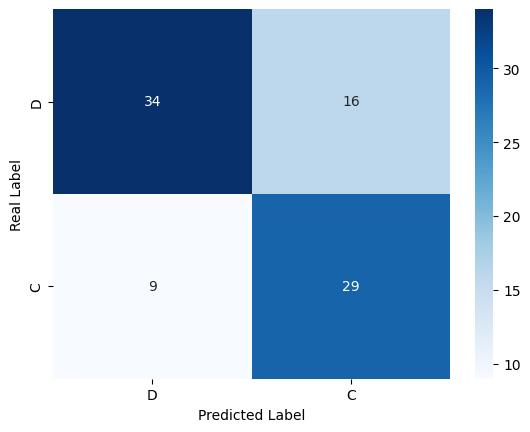

In [13]:
y_pred = predict(model_final, X_test)
show_report(y_test, y_pred)
show_confusion_matrix(y_test, y_pred, class_names)

In [14]:
eval_model(y_test, y_pred)

Métricas de evaluación:
Precision: 0.7275
Recall: 0.7159
F1-score: 0.7172


# Visualizacion

In [15]:
import os

os.environ["PATH"] += os.pathsep + '/usr/bin/dot'

In [16]:
import keras
from keras.utils import plot_model

import importlib
importlib.reload(keras)

<module 'keras' from '/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/keras/__init__.py'>

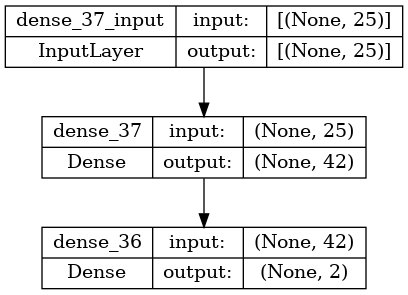

In [17]:
plot_model(model_final, show_shapes=True)

In [18]:
model_final.save('/home/alvaro/Downloads/modelo.h5')

/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## FIrst layer

In [27]:
print(len(model_final.layers))

2


In [29]:
first_layer = model_final.layers[0]

# Accede a los pesos de la primera capa
weights = first_layer.get_weights()

In [33]:
weights[0]

array([[ 1.7327733e-02,  2.6085001e-01, -9.6531451e-02, ...,
        -2.4634662e-01,  1.1384028e-01,  1.5654759e-01],
       [-2.1186799e-03, -5.4063346e-02, -5.7276793e-02, ...,
         2.9518167e-02,  9.5507786e-02, -1.6080546e-01],
       [ 6.0933542e-02,  4.9111012e-02, -4.8402557e-04, ...,
         5.0642210e-01, -4.3162424e-02,  2.2604729e-01],
       ...,
       [-1.7657095e-01, -1.6828007e-01, -1.0037166e-25, ...,
         1.3990818e-02, -6.0113734e-03,  1.7088281e-01],
       [-2.6089414e-03,  1.9125734e-01, -2.4163365e-35, ...,
        -3.3163983e-02,  4.5146365e-03,  5.0967019e-02],
       [-9.3822658e-02, -7.5831257e-02,  3.8975238e-20, ...,
         2.7953306e-11,  1.6758864e-14,  9.3054913e-02]], dtype=float32)

In [34]:
feature_importance = np.sum(np.abs(weights[0]), axis=1)


In [35]:
feature_importance


array([5.1720724e+00, 4.8625774e+00, 3.2166541e+00, 3.9348564e+00,
       2.7491107e+00, 4.6043143e+00, 4.7226291e+00, 5.2926140e+00,
       4.4313655e+00, 5.2634392e+00, 3.5336797e+00, 1.5880214e+00,
       8.4767914e-01, 6.5993243e-01, 4.2803818e-03, 8.4327763e-01,
       6.9455075e-01, 9.5836031e-01, 4.8704430e-01, 2.1972330e+00,
       1.1675508e+00, 1.9251714e+00, 1.4014008e+00, 1.3070482e+00,
       6.9130898e-01], dtype=float32)

In [42]:

# Calcula los índices que ordenan 'feature_importance' en orden descendente
sorted_indices = np.argsort(feature_importance)[::-1]

# Ordena las importancias y los nombres de las variables en el mismo orden
sorted_importance = feature_importance[sorted_indices]
sorted_names = [features_names[i] for i in sorted_indices]

In [43]:
sorted_names

['SGOT',
 'Platelets',
 'N_Days',
 'Age',
 'Alk_Phos',
 'Copper',
 'Tryglicerides',
 'Cholesterol',
 'Prothrombin',
 'Bilirubin',
 'Albumin',
 'Hepatomegaly_N',
 'Sex_F',
 'Stage',
 'Sex_M',
 'Ascites_N',
 'Hepatomegaly_Y',
 'Drug_D-penicillamine',
 'Edema_N',
 'Spiders_N',
 'Spiders_Y',
 'Ascites_Y',
 'Edema_S',
 'Drug_Placebo',
 'Edema_Y']

In [41]:
import matplotlib.pyplot as plt


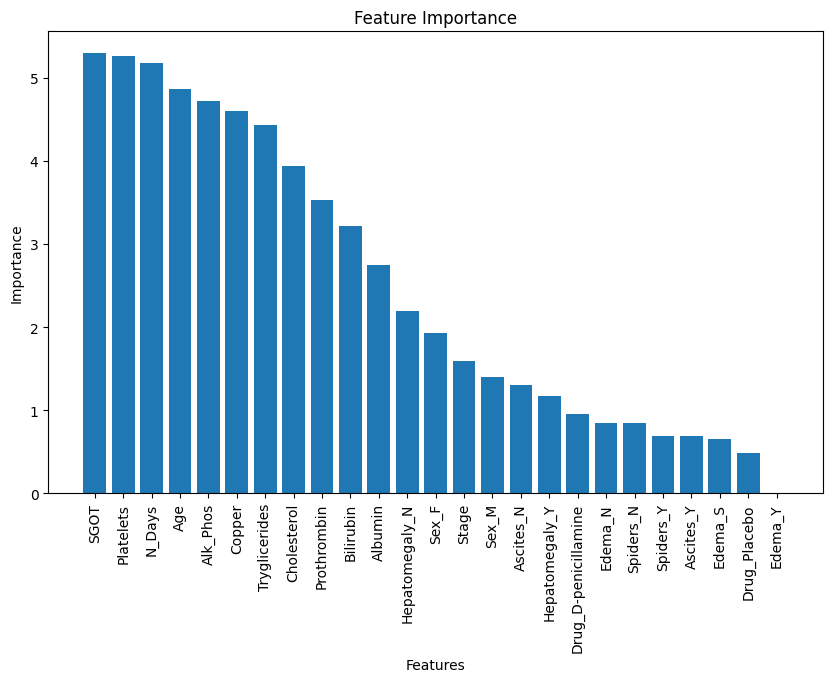

In [46]:
# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotar los nombres de las variables para mayor legibilidad
plt.show()